# Функции в Pandas
Примеры из презентации

In [1]:
import pandas as pd

In [ ]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df

In [ ]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0], 'calculated': [False, False, True]})
df[['user_id', 'clicks', 'orders', 'calculated']]

In [ ]:
def watcher(param):
    """Мне только посмотреть"""
    return param == 0

In [ ]:
df['watcher'] = df['orders'].apply(watcher)
df

Применяем метод apply к одному столбцу. Сейчас в переменную функции передаются значения одного столбца

In [ ]:
def conversion(row):
    """Подсчет конверсии переходов в покупки"""
    return row['orders'] / row['clicks']

### Как потестировать функцию со значениями одной строки

In [ ]:
row1 = pd.DataFrame({'clicks': [163], 
                     'orders': [2], 
                     'user_id': [1]})
conversion(row1)

Применяем метод apply к датафрейму. В переменную функции передаются строки целиком

In [ ]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df[['user_id', 'clicks', 'orders']]

In [ ]:
df['conversion'] = df.apply(conversion, axis=1)

In [ ]:
df[['user_id', 'clicks', 'orders', 'conversion']]

### Как создавать столбцы с помощью функций

In [ ]:
df = pd.DataFrame({'user_id': [1, 2, 3]})

In [ ]:
df

In [ ]:
def metriks(row):
    """Возвращает новый столбец в зависимости от значения user_id"""
    user_id = row.user_id
    
    return pd.Series({'col_{}'.format(user_id): 1})

In [ ]:
df = df.apply(metriks, axis=1)
df

### Анализ рекламных кампаний

In [2]:
import pandas as pd

In [18]:
stats = pd.read_excel('ad_campaigns.xlsx')
stats.drop(['Unnamed: 7', 'Unnamed: 8'], axis = 1, inplace = True)
stats.head()

,Название группы,Фраза (с минус-словами),Продуктивность,ID объявления,Заголовок,Текст,Ссылка
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


In [19]:
stats.columns = ['group', 'phrase', 'effect', 'ad_id', 'title', 'text', 'link']
stats.head()

,group,phrase,effect,ad_id,title,text,link
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


### Lambda-функции
Хотим посчитать распределение количества слов в столбце с фразами

In [20]:
phrase = 'МРТ на Менделеевской от 2000'

In [21]:
len(phrase.split(' '))

5

In [22]:
stats['word_count'] = stats['phrase'].apply(lambda word: len(word.split(' ')))
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [23]:
# вариант с передачей всей строчки функции
# тут надо обязательно указать параметр axis = 1

stats['word_count'] = stats.apply(lambda x: len(x['phrase'].split(' ')), axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


Простая визуализация

In [24]:
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

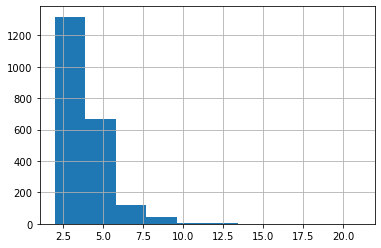

In [25]:
stats['word_count'].hist()

<AxesSubplot:>

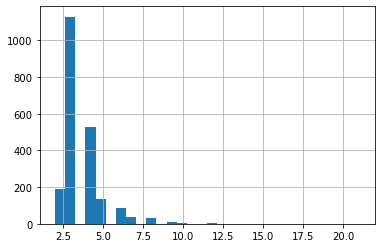

In [26]:
stats['word_count'].hist(bins=30)

### Упражнение
Поисковые запросы с каким количеством слов встречаются в наших данных чаще всего? Выведите топ-5

In [38]:
stats1 = stats.word_count.value_counts()
print(stats1)

3     1129
4      529
2      189
5      137
6       84
7       38
8       30
9       12
10       6
12       2
11       1
17       1
21       1
Name: word_count, dtype: int64


### Произвольные функции
В URL кампаний есть названия. С этим надо что-то делать

In [39]:
# пример ссылки
url = stats.loc[0, 'link']
url

'https://awesome-site.ru/?utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}'

In [40]:
from urllib import parse

In [41]:
parse.urlsplit('https://ya.ru/news/sport?search=footbal#abc')

SplitResult(scheme='https', netloc='ya.ru', path='/news/sport', query='search=footbal', fragment='abc')

In [44]:
parsed = parse.urlsplit(url)
parsed

SplitResult(scheme='https', netloc='awesome-site.ru', path='/', query='utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}', fragment='')

In [ ]:
# можно конечно вручную
parsed.query.split('&')[2].split('=')[1]

In [45]:
# как доставать значения

parsed.netloc

'awesome-site.ru'

In [46]:
params = parse.parse_qs(parsed.query)
params

{'utm_source': ['yandex'],
 'utm_medium': ['cpc'],
 'utm_campaign': ['a825749b87'],
 'utm_content': ['dev_{device_type}']}

In [ ]:
# вот и кампании

params['utm_campaign'][0]

In [ ]:
# зачем тут везде списки?

url_with_doubles = 'https://awesome-site.ru/?a=1&a=2&a=3'

parsed = parse.urlsplit(url_with_doubles)
parse.parse_qs(parsed.query)

In [48]:
# оборачиваем все в функцию
# в качестве аргумента будет строка датафрейма

def campaign_name(row):
    """Получение названия кампании из ссылки внутри строки row"""

    parsed = parse.urlsplit(row['link'])
    params_dict = parse.parse_qs(parsed.query)

    return params_dict['utm_campaign'][0]

In [49]:
# проверяем датафрейм
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [50]:
stats['campaign'] = stats.apply(campaign_name, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca


### Как передать в функцию несколько аргументов

In [ ]:
# как передать несколько аргументов

def power_up(row, n):
    """Возводит значение столбца effect в степень n"""
    return row['effect'] ** n

In [ ]:
stats['power_up'] = stats.apply(power_up, n=3, axis=1)
stats.head()

### Упражнение
В наших данных есть много объявлений с услугой МРТ (в столбце group есть слово 'мрт') круглосуточно (в тексте объявления text есть '24 часа'). Отфильтруйте строки, в которых НЕ упоминается МРТ, но прием идет круглосуточно. Сколько таких строк в датасете?

In [92]:
print(stats.shape)

def cont(x):
    
    if 'мрт' not in x.group and '24 часа' in x.text:
        stats['check'] = True
    else:
        stats['check'] = False
    return stats

stats.apply(cont, axis = 1)

stats[(stats['check'] == True)]
#stats[(stats['check'] == False )]

(2159, 10)


,group,phrase,effect,ad_id,title,text,link,word_count,campaign,check


# Группировки

In [93]:
df = pd.DataFrame({'order_id': [1, 2, 3, 4, 5], 'country': ['Россия', 'Китай', 'Китай', 'Россия', 'Россия'], 
                   'category': ['Электроника', 'Авто', 'Электроника', 'Авто', 'Авто'], 
                   'amount': [100, 80, 90, 140, 90]})
df

,order_id,country,category,amount
0,1,Россия,Электроника,100
1,2,Китай,Авто,80
2,3,Китай,Электроника,90
3,4,Россия,Авто,140
4,5,Россия,Авто,90


### Упражнение
Создайте датафрейм df_russia, в котором оставьте заказы из России. И аналогично df_china (заказы из Китая).

In [99]:
def ty(x):
    sum_ = 0
    sum_2 = 0
    if 'Росcия' in x.country:
        sum_ += x.amount
    if 'Китай' in x.country:
        sum_2 += x.amount
    return(x)

df.apply(ty, axis = 1)
df.country.unique()
if 'Росcия' in df.country:
    x.amount = sum_
if 'Китай' in df.country:
    x.amount = sum_2

df

,order_id,country,category,amount
0,1,Россия,Электроника,100
1,2,Китай,Авто,80
2,3,Китай,Электроника,90
3,4,Россия,Авто,140
4,5,Россия,Авто,90


### Упражнение
Посчитайте для df_russia и df_china:
- среднюю стоимость заказа
- разницу между максимальной и минимальной стоимостью заказа

Объединим процесс разбиения на датафреймы

In [ ]:
def groupby_function(data):
    return data.amount.max() - data.amount.min()

In [ ]:
df.groupby('country').apply(groupby_function)

Вернемся к статистике рекламных кампаний

In [ ]:
# раньше использовали value_counts

stats['campaign'].value_counts().head()

In [ ]:
# более универсальный способ

stats.groupby('campaign').count().head()

In [ ]:
stats.groupby('campaign').count()[['group', 'effect']].head()

### Как вернуть столбец из индекса - метод reset_index()

In [ ]:
stats.groupby('campaign').count().reset_index().head()

### К группировке можно применять разные функции такие образом:

In [ ]:
obj = stats.groupby('campaign')

In [ ]:
obj.max().head()

In [ ]:
obj.mean().head()

### Упражнение
Для каждой кампании campaign найдите минимальное значение столбца effect и постройте рейтинг кампаний по этим значениям, начиная с самого низкого.

### Несколько функций в группировках

In [ ]:
# задаем несколько функций сразу

stats.groupby('campaign').agg(['min', 'max'])['effect'].head()

In [ ]:
# разные метрики для разных столбцов

results = stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})
results.head()

### Как обращаться к вложенным столбцам

In [ ]:
results['effect']['max'].head()

In [ ]:
# или даже так
stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})['effect']['max'].head()

In [ ]:
# группировка по нескольким столбцам

stats.groupby(['group', 'campaign']).count().head()

In [ ]:
# максимальное число объявлений в одной группе

stats.groupby(['group', 'campaign']).count().sort_values('phrase', ascending=False).head()

### Упражнение
Какая кампания имеет наименьшую сумму по столбцу effect? 